## Imports

In [21]:
import cv2 as cv
import numpy as np
import os

import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Flatten, Conv2D, MaxPooling2D, Dropout, BatchNormalization
from keras.optimizers import adam_v2
from tensorflow.keras import layers
from tensorflow.keras.utils import to_categorical
import matplotlib.pyplot as plt

import seaborn as sns
plt.style.use('fivethirtyeight')


## Test GPU

In [2]:
physical_devices = tf.config.list_physical_devices('GPU') 
tf.config.experimental.set_memory_growth(physical_devices[0], True)
print("GPUs available:",len(physical_devices))

GPUs available: 1


## Prepare data

## Import label examples

In [11]:
images_path = 'C:/Users/lucas/OneDrive/Documentos/GitHub/real-pokedex/pokemon_jpg'
pokemons = os.listdir(images_path+'/')
num_pokemons = 721
imgs = len(pokemons)
classes = []
imgsdata = []
for img in pokemons:
    imgdata = cv.imread(os.path.join(images_path,img))
    imgdata = cv.resize(imgdata, (32, 32),0,0,cv.INTER_LINEAR)
    imgsdata.append(imgdata)
    classes.append(int(img.split('.')[0].split('-')[0][:3]))
imgsdata = np.array(imgsdata).reshape(len(imgsdata),32,32,3)

## Import train and test data

In [14]:
classes_arr = np.zeros((len(classes),num_pokemons))
for i in range(len(classes_arr)):
    classe_idx = classes[i]-1
    classes_arr[i][classe_idx] = 1
test = 0.3
num_test = int(imgs*test)
num_train = imgs-num_test
test_indexes = np.random.choice(classes_arr.shape[0], num_test, replace=False)  
X_train = []
y_train = []
X_test = []
y_test = []
for idx in test_indexes:
    X_test.append(imgsdata[idx])
    y_test.append(classes_arr[idx])
    
X_test = np.array(X_test)/255.0
y_test = np.array(y_test)
X_train = np.delete(imgsdata, test_indexes,0)/255.0
y_train = np.delete(classes_arr, test_indexes,0)

# Setup and train model

In [44]:
model = Sequential()
model.add(Conv2D(32, 3, padding = 'same', activation = 'relu', input_shape =(32,32,3), kernel_initializer = 'he_normal'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(64, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(128, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(Conv2D(256, 3, padding = 'same', kernel_initializer = 'he_normal', activation = 'relu'))
model.add(BatchNormalization(axis = -1))
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(256, activation = 'relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(num_pokemons, activation = 'softmax'))

lr = 1e-4

opt = adam_v2.Adam(learning_rate=lr, beta_1=0.5)

model.compile(
            loss= 'categorical_crossentropy', \
            optimizer= opt, \
            metrics = ['accuracy']
            )

num_epochs = 500
batch_size = 32

hist = model.fit(X_train, y_train, batch_size = batch_size, epochs = num_epochs, verbose=0, validation_split = 0.1)
# save the model
# model.save('pokedex.model')

## Plot loss and accuracy

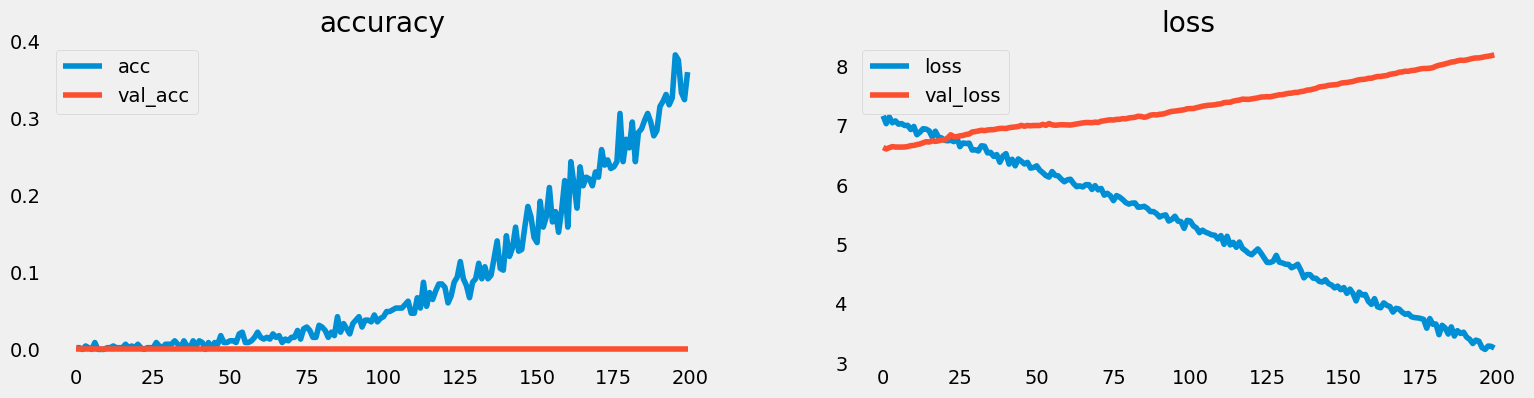

In [41]:
# Plot learning curves
fig = plt.figure(figsize = (17, 8))
    
plt.subplot(121)
plt.plot(hist.history['accuracy'], label = 'acc')
plt.plot(hist.history['val_accuracy'], label = 'val_acc')
plt.legend()
plt.grid()
plt.title(f'accuracy')

plt.subplot(122)
plt.plot(hist.history['loss'], label = 'loss')
plt.plot(hist.history['val_loss'], label = 'val_loss')
plt.legend()
plt.grid()
plt.title(f'loss')

plt.show()

## Test model

Predicted index: 478
Predicted should match label: 118


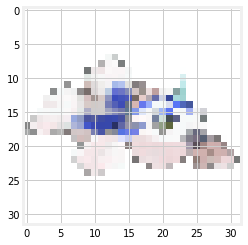

In [214]:
pred = model.predict(X_test)
index = 32 #the index you want to test
result = np.argmax(pred[index])
result_class = classes[result]
print("Predicted index: %d" % np.argmax(pred[index]))
print("Predicted should match label: %d" %(np.where(y_test[index]==1)[0]+1))
plt.imshow(x_test[index], interpolation='nearest')

In [220]:
model.evaluate(x_test, y_test)

245/245 [==============================] - 0s 351us/step


[14.416935897360043, 0.04897959191276103]

In [224]:
plt.plot(hist.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.show()


KeyError: 'val_accuracy'

In [225]:
hist.history

{'val_loss': [6.759997137661638,
  6.9747266933835785,
  8.804450857228247,
  8.968516711531015,
  9.969410435906772,
  11.652966071819437,
  13.047737910829742,
  14.026050107232455,
  14.893291045879495,
  15.542086699913288,
  15.466248018988248,
  15.813215518819876,
  15.936357300857019,
  15.943450730422448,
  15.99959189316322,
  16.06588988468565,
  16.086525621085332,
  16.09464092912345,
  16.09885097372121,
  16.106579089986866,
  16.109231619999328,
  16.11109003527411,
  16.11150886272562,
  16.113681924754175,
  16.115092047329608,
  16.115307775037042,
  16.116416931152344,
  16.116852595888336,
  16.116670542749866,
  16.118017525508485,
  16.11809539794922,
  16.11809539794922,
  16.11809539794922,
  16.11809539794922,
  16.11809539794922,
  16.11809539794922,
  16.11809539794922,
  16.11809539794922,
  16.11809539794922,
  16.11809539794922,
  16.11809539794922,
  16.11809539794922,
  16.11809539794922,
  16.11809539794922,
  16.11809539794922,
  16.11809539794922,
  